# 4.2 - Más modelos USL

In [1]:
import pylab as plt
%matplotlib inline

from sklearn.datasets import make_moons

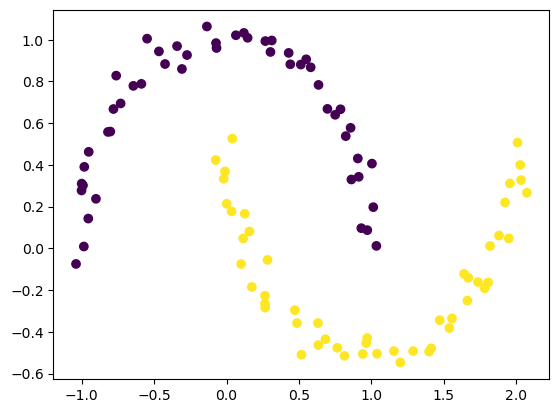

In [2]:
moons=make_moons(n_samples=100, shuffle=True, noise=0.05)

plt.scatter(moons[0][:,0],   # x
            moons[0][:,1],   # y
            c=moons[1]);     # color

# DBSCAN 

**Density Based Spatial Clustering of Applications with Noise**

![dbscan](images/dbscan.png)


DBSCAN requiere de dos parámetros:

+ $\epsilon$ : distancia de la vecindad
+ Número mínimo de puntos para considerarla vecindad

Se comienza con un punto arbitrario que no haya sido visitado. La $\epsilon$-vecindad de éste punto se evalúa, para determinar su densidad y si tiene suficientes puntos se clusteriza, si no, se considera que el punto es ruido.


**Ventajas**
+ No necesita saber el nº de clusters
+ Se reduce el single-link (un cluster dentro de otro)
+ Tiene noción del ruido (detecta muy bien outliers)
+ Solo dos parámetros


**Desventajas**
+ No es determinista en los límites del cluster
+ Depende de la distancia
+ No puede manejar grandes diferencias de densidad


https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

In [3]:
from sklearn.cluster import DBSCAN

In [4]:
dbscan=DBSCAN()

dbscan.fit(moons[0])

DBSCAN()

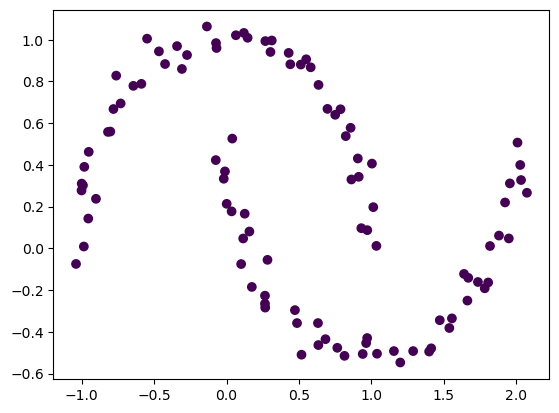

In [6]:
plt.scatter(moons[0][:,0],   # x
            moons[0][:,1],   # y
            c=dbscan.labels_);     # color

In [8]:
#help(DBSCAN)

In [18]:
dbscan=DBSCAN(eps=0.3, min_samples=3)

dbscan.fit(moons[0])

DBSCAN(eps=0.3, min_samples=3)

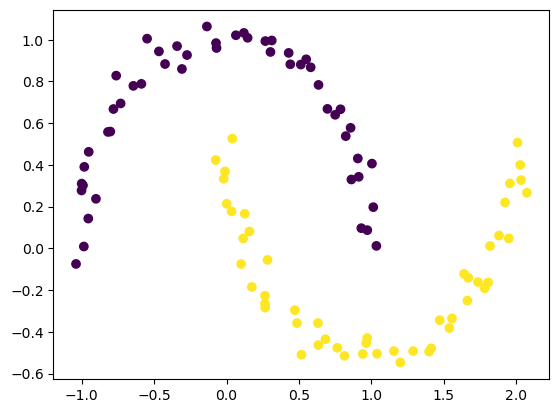

In [19]:
plt.scatter(moons[0][:,0],   # x
            moons[0][:,1],   # y
            c=dbscan.labels_);     # color

In [20]:
dbscan.labels_

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

# HDBSCAN

**Hierarchical DBSCAN**

https://hdbscan.readthedocs.io/en/latest/how_hdbscan_works.html

Extiende DBSCAN haciéndolo jerárquico. El algoritmo se basa en:

1) Transformar el espacio según densidad

2) Grafo de árboles de distancias

3) Cluster jerárquicos

4) Condensar los clusters basándose en el tamaño

5) Extraer clusters estables desde el árbol

In [ ]:
%pip install hdbscan

In [21]:
from hdbscan import HDBSCAN

In [24]:
hdbscan=HDBSCAN(gen_min_span_tree=True)

In [25]:
hdbscan.fit(moons[0])

HDBSCAN(gen_min_span_tree=True)

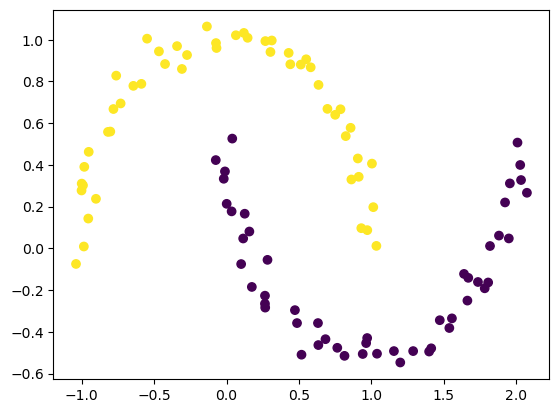

In [26]:
plt.scatter(moons[0][:,0], 
            moons[0][:,1], 
            c=hdbscan.labels_);

In [27]:
hdbscan.labels_

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

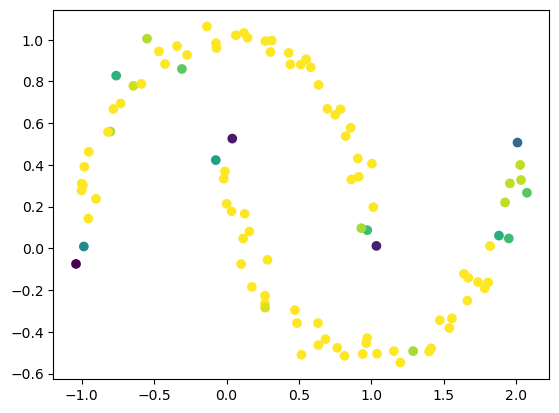

In [30]:
plt.scatter(moons[0][:,0], 
            moons[0][:,1], 
            c=hdbscan.probabilities_);

In [29]:
hdbscan.probabilities_[:10]

array([0.94886411, 1.        , 0.64250403, 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.64658828, 1.        ])

In [31]:
hdbscan.probabilities_.min()

0.6162444891602026

In [32]:
import pandas as pd

df=pd.DataFrame(moons[0])

df['label']=hdbscan.labels_

df['prob']=hdbscan.probabilities_

df[df.prob<0.7]

,0,1,label,prob
2,0.039281,0.526230,0,0.642504
8,1.034247,0.011859,1,0.646588
48,-1.039356,-0.074669,1,0.616244


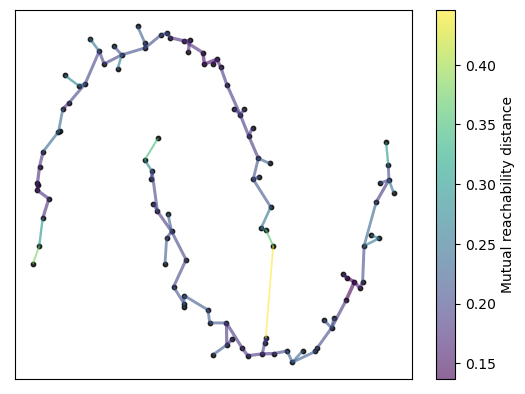

In [33]:
hdbscan.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                    edge_alpha=0.6,
                                    node_size=10,
                                    edge_linewidth=1.2);

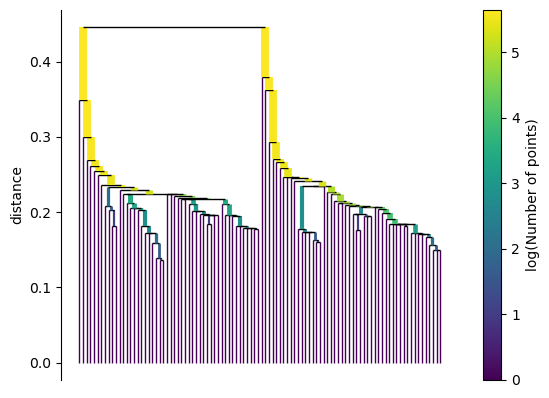

In [34]:
hdbscan.single_linkage_tree_.plot(cmap='viridis',
                                  colorbar=True);

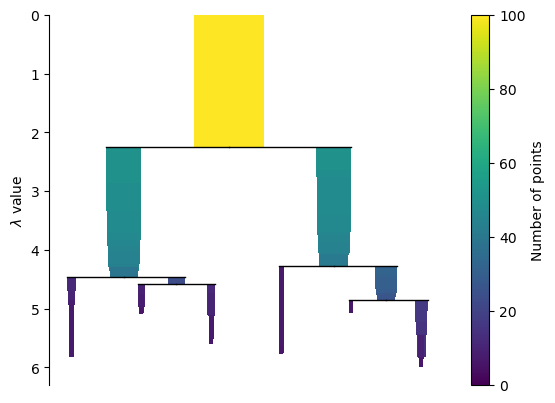

In [35]:
hdbscan.condensed_tree_.plot();

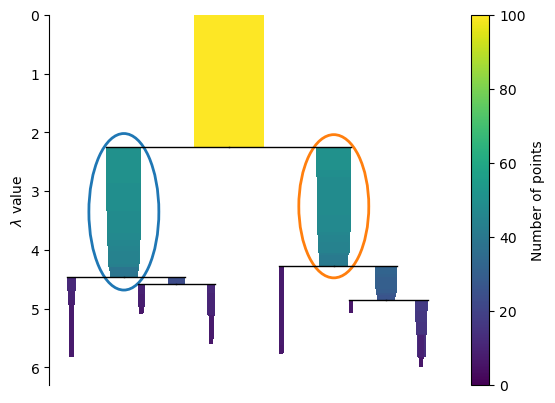

In [36]:
import seaborn as sns

hdbscan.condensed_tree_.plot(select_clusters=True,
                             selection_palette=sns.color_palette());

# OPTICS

**Ordering Points To Identify the Clustering Structure**

Generalización del DBSCAN, busca el núcleo de la muestra con la más alta densidad y expande los clusteres desde ahí.

![optics](images/optics.png)

In [37]:
from sklearn.cluster import OPTICS

In [38]:
opt=OPTICS(max_eps=1, eps=0.5, min_samples=5)

opt.fit(moons[0])

OPTICS(eps=0.5, max_eps=1)

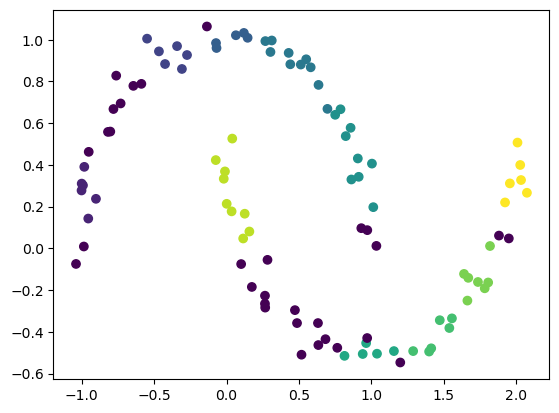

In [39]:
plt.scatter(moons[0][:,0], 
            moons[0][:,1], 
            c=opt.labels_);

In [40]:
opt.labels_

array([-1,  5,  8, -1,  6, -1, -1,  7, -1,  7,  6,  5,  6, -1, -1, -1,  1,
       -1,  3,  7,  3,  1,  0,  7, -1,  5,  1,  2,  8,  2,  6,  1,  0,  5,
       -1,  3,  8,  5,  9,  8,  1,  4,  7,  6,  7, -1, -1, -1, -1,  8,  3,
        2, -1,  0,  9, -1,  3,  6,  9,  4,  8,  3, -1,  2,  8,  0,  4,  9,
       -1,  9,  3, -1,  9, -1,  0,  4,  4,  4,  8,  8, -1, -1,  4, -1, -1,
       -1, -1,  2,  1,  7, -1,  0,  3,  3,  3, -1,  4, -1,  4, -1])

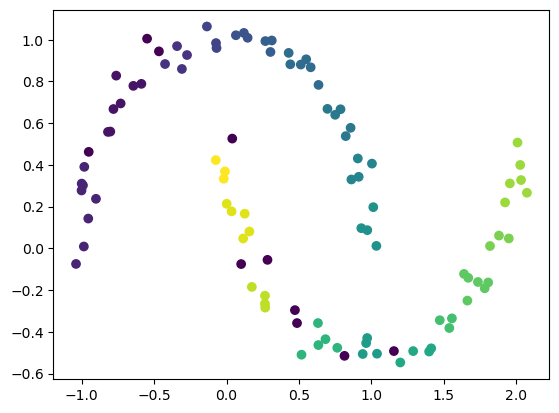

In [41]:
opt=OPTICS(max_eps=0.35, eps=0.05, min_samples=3)

opt.fit(moons[0])

plt.scatter(moons[0][:,0], 
            moons[0][:,1], 
            c=opt.labels_);

# GMM

**Gaussian Mixture Models**

Se asume que los datos son mezclas de un nº finito de distribuciones gaussianas de parámetros desconocidos (N($\mu$,$\sigma$))


![gmm](images/gmm.png)


![gmm2](images/gmm2.png)

In [42]:
from sklearn.mixture import GaussianMixture as GM

In [43]:
gm=GM(n_components=2, 
      covariance_type='full')

gm.fit(moons[0])

gm.means_

array([[-0.16003943,  0.6449173 ],
       [ 1.12139789, -0.12888266]])

In [44]:
gm.covariances_

array([[[0.35509459, 0.06782214],
        [0.06782214, 0.10305828]],

       [[0.36554416, 0.05125511],
        [0.05125511, 0.10259559]]])

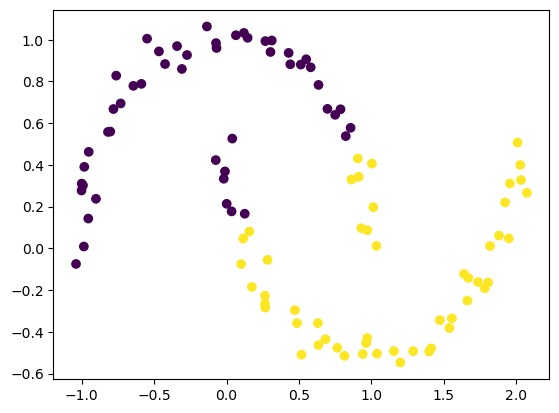

In [45]:
plt.scatter(moons[0][:,0], 
            moons[0][:,1], 
            c=gm.predict(moons[0]));

In [46]:
gm.predict(moons[0])

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0])

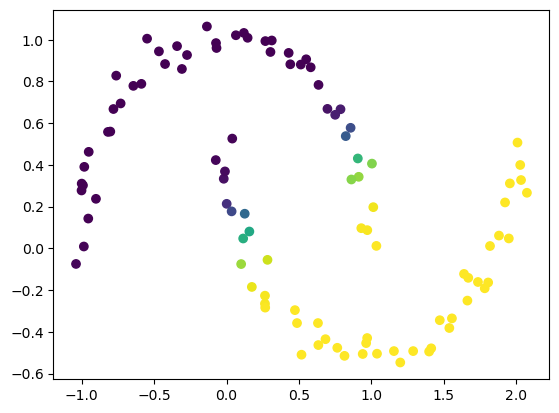

In [47]:
plt.scatter(moons[0][:,0], 
            moons[0][:,1], 
            c=gm.predict_proba(moons[0])[:, 1]);

In [48]:
from sklearn.datasets import make_classification as mc

In [56]:
X=mc(n_features=2, 
     n_redundant=0, 
     n_informative=2, 
     n_clusters_per_class=1)

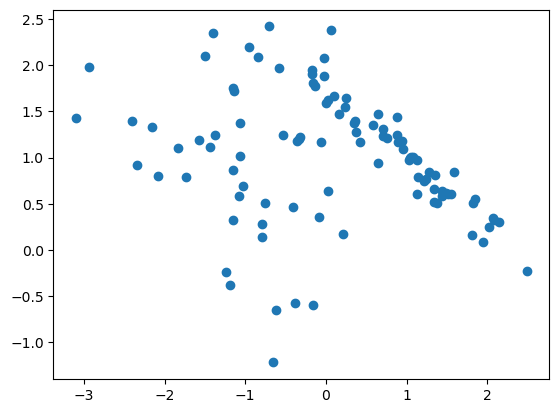

In [57]:
plt.scatter(X[0][:,0], X[0][:,1]);

In [58]:
gm=GM(n_components=2, covariance_type='full')

gm.fit(X[0])

gm.means_

array([[ 0.94476673,  1.03425097],
       [-1.00594028,  0.9384543 ]])

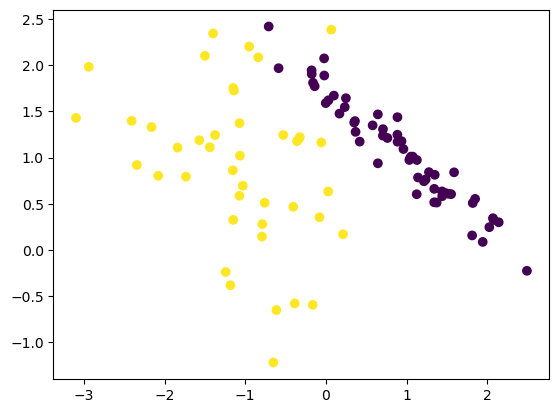

In [59]:
plt.scatter(X[0][:,0], X[0][:,1], c=gm.predict(X[0]));

In [60]:
gm.predict(X[0])

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0])

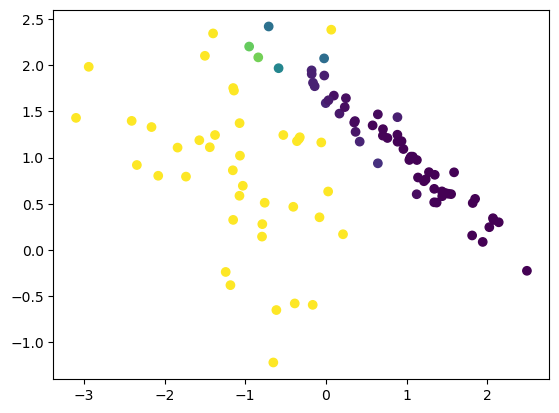

In [61]:
plt.scatter(X[0][:,0], X[0][:,1], c=gm.predict_proba(X[0])[:, 1]);

![](data/usl_models.png)

![usl_models](images/usl_models.png)